In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-03-BIGDATA/master/init.py
import init; init.init(force_download=False);
from IPython.display import Image

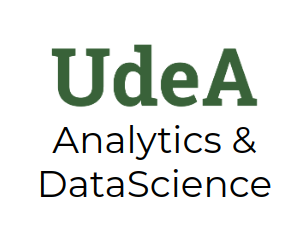

In [ ]:
Image("local/imgs/udea-datascience.png")

# **TALLER 1: RDD**

## Desarrollado por: Mg. Efraín Alberto Oviedo

## Universidad de Antioquia


**Nombre Completo:**

- Maria Isabel Duque Buitrago
- Cristhian Camilo Ocampo Bolivar
- Leidy Estefanía Silva Torres

**Cédula:**

- 1.037.666.575
- 1.152.220.729
- 1.020.479.068

**Correo Institucional:**

- maria.duqueb@udea.edu.co
- cristhian.ocampo@udea.edu.co
- estefania.silva@udea.edu.co


In [ ]:
#Instalación
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.5.5/spark-3.5.5-bin-hadoop3.tgz
!tar xf spark-3.5.5-bin-hadoop3.tgz
!pip install -q findspark

#Variables de Entorno
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.5-bin-hadoop3"

#SparkContext
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark import SparkContext
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = SparkContext.getOrCreate()

In [ ]:
file = sc.textFile("/content/local/data/accidentalidad.csv")
file.take(5)

['RADICADO,FECHA,HORA,DIA,CLASE,DIRECCION,TIPO_GEOCOD,GRAVEDAD,BARRIO,COMUNA,DISENO',
 '1565221,01/01/2017,00:10:00,DOMINGO  ,Atropello,CL 68 CR 87,EPM con Interior,HERIDO,Palenque,Robledo,Tramo de via',
 '1565189,01/01/2017,00:20:00,DOMINGO  ,Choque,CL 44 CR 93,EPM sin Interior,HERIDO,Campo Alegre,La América,Tramo de via',
 '1565182,01/01/2017,00:20:00,DOMINGO  ,Choque,CR 16 CL 56,Malla vial,HERIDO,Villatina,Villa Hermosa,Tramo de via',
 '1565404,01/01/2017,01:25:00,DOMINGO  ,Choque,CR 41 CL 85,Malla vial,SOLO DAÑOS,Las Granjas,Manrique,Interseccion']

In [ ]:
header = file.first()
data = file.filter(lambda row: row != header)
data.take(5)

['1565221,01/01/2017,00:10:00,DOMINGO  ,Atropello,CL 68 CR 87,EPM con Interior,HERIDO,Palenque,Robledo,Tramo de via',
 '1565189,01/01/2017,00:20:00,DOMINGO  ,Choque,CL 44 CR 93,EPM sin Interior,HERIDO,Campo Alegre,La América,Tramo de via',
 '1565182,01/01/2017,00:20:00,DOMINGO  ,Choque,CR 16 CL 56,Malla vial,HERIDO,Villatina,Villa Hermosa,Tramo de via',
 '1565404,01/01/2017,01:25:00,DOMINGO  ,Choque,CR 41 CL 85,Malla vial,SOLO DAÑOS,Las Granjas,Manrique,Interseccion',
 '1565185,01/01/2017,01:30:00,DOMINGO  ,Choque,CR 76 CL 91,Malla vial,HERIDO,Kennedy,Doce de Octubre,Tramo de via']

#**Análisis de Accidentalidad en la ciudad de Medellín**

La secretaría de movilidad de la alcaldía de Medellín ha recolectado datos relacionados con la accidentalidad vial del año 2017 (Disponible en https://www.datos.gov.co) registrando en cada accidente la siguiente información:

- Fecha
- Hora
- Día de la semana
- Clase de accidente
- Dirección
- Gravedad
- Barrio
- Comuna

Con el fin de adelantar programas que permitan disminuir la accidentalidad vial en la ciudad, se requiere de su ayuda para generar un informe que contenga la siguiente información:


## **A) Porcentaje de accidentes en cada día de la semana**


Presente aquí el código desarrollado y el resultado obtenido


In [ ]:
data=data.map(lambda x: x.split(","))
data.take(5)

[['1565221',
  '01/01/2017',
  '00:10:00',
  'DOMINGO  ',
  'Atropello',
  'CL 68 CR 87',
  'EPM con Interior',
  'HERIDO',
  'Palenque',
  'Robledo',
  'Tramo de via'],
 ['1565189',
  '01/01/2017',
  '00:20:00',
  'DOMINGO  ',
  'Choque',
  'CL 44 CR 93',
  'EPM sin Interior',
  'HERIDO',
  'Campo Alegre',
  'La América',
  'Tramo de via'],
 ['1565182',
  '01/01/2017',
  '00:20:00',
  'DOMINGO  ',
  'Choque',
  'CR 16 CL 56',
  'Malla vial',
  'HERIDO',
  'Villatina',
  'Villa Hermosa',
  'Tramo de via'],
 ['1565404',
  '01/01/2017',
  '01:25:00',
  'DOMINGO  ',
  'Choque',
  'CR 41 CL 85',
  'Malla vial',
  'SOLO DAÑOS',
  'Las Granjas',
  'Manrique',
  'Interseccion'],
 ['1565185',
  '01/01/2017',
  '01:30:00',
  'DOMINGO  ',
  'Choque',
  'CR 76 CL 91',
  'Malla vial',
  'HERIDO',
  'Kennedy',
  'Doce de Octubre',
  'Tramo de via']]

In [ ]:
accid_dia=data.map(lambda x: ((x[3]),1)).reduceByKey(lambda x,y: x+y)
accid_dia.take(7)

[('DOMINGO  ', 3917),
 ('JUEVES   ', 6275),
 ('MARTES   ', 6817),
 ('SÁBADO   ', 6055),
 ('LUNES    ', 5981),
 ('MIÉRCOLES', 6604),
 ('VIERNES  ', 6909)]

In [ ]:
total_accidentes = accid_dia.map(lambda x: x[1]).sum()
porcentaje_por_dia = accid_dia.map(lambda x: (x[0], round((x[1] / total_accidentes)*100,2)))
porcentaje_por_dia.collect()
sorted_porcentaje_por_dia = porcentaje_por_dia.sortBy(lambda x: x[1], ascending=False)
sorted_porcentaje_por_dia.collect()

[('VIERNES  ', 16.23),
 ('MARTES   ', 16.02),
 ('MIÉRCOLES', 15.52),
 ('JUEVES   ', 14.74),
 ('SÁBADO   ', 14.23),
 ('LUNES    ', 14.05),
 ('DOMINGO  ', 9.2)]

El viernes se destaca como el día con mayor accidentalidad en la ciudad de Medellín, concentrando el 16,23 % del total de accidentes registrados en el año 2017. Esto puede estar relacionado con un aumento en el flujo vehicular propio del cierre de la semana laboral, incluyendo desplazamientos hacia actividades recreativas, retornos desde lugares de trabajo y viajes de fin de semana.

En contraste, el domingo registra el menor porcentaje de accidentes, con un 9,2 %. Esta disminución podría explicarse por ser un día típicamente asociado al descanso, lo que se traduce en una notable reducción del tránsito vehicular en la ciudad.


## **B) Barrio en el que se presenta el mayor y el menor número de accidentes**


In [ ]:
barrio=data.map(lambda x: ((x[8]),1))
barrio=barrio.reduceByKey(lambda x,y: x+y)
barrio.take(5)

[('Palenque', 55),
 ('Campo Alegre', 119),
 ('Miranda', 208),
 ('Centro Administrativo', 65),
 ('Manrique Oriental', 168)]

In [ ]:
acc_por_barrio = barrio.collect()
mayor_barrio = max(acc_por_barrio, key=lambda item: item[1])
menor_barrio = min(acc_por_barrio, key=lambda item: item[1])

print("Barrio con el mayor número de accidentes:", mayor_barrio)
print("Barrio con el menor número de accidentes:", menor_barrio)

Barrio con el mayor número de accidentes: ('La Candelaria', 944)
Barrio con el menor número de accidentes: ('Villa Lilliam', 1)


La Candelaria es una de las zonas con mayor accidentalidad en Medellín debido a su alta concentración de actividad comercial, administrativa y de transporte. Aunque es la comuna menos poblada, su ubicación en el centro de la ciudad la convierte en un punto de gran afluencia peatonal y vehicular durante el día. Esta intensa movilidad, sumada a la presencia de numerosas rutas de transporte público y cruces concurridos, incrementa significativamente el riesgo de accidentes viales. Por otra parte, el barrio Villa Lilliam, esta ubicado en una zona periferica de la ciudad lo que puede presentar menor riesgo de accidentes viales asociados a un bajo flujo vehicular.


## **C) Comuna en la que se presenta mayor número de accidentes con muertos**


Presente aquí el código desarrollado y el resultado obtenido


In [ ]:
accidentes_muertos = data.filter(lambda x: x[7].strip()=="MUERTO")
print(accidentes_muertos.take(5))

[['12', '01/01/2017', '05:05:00', 'DOMINGO  ', 'Atropello', 'CL 77 A CR 88', 'Malla vial', 'MUERTO', 'Aures No.1', 'Robledo', 'S/I'], ['20', '01/01/2017', '08:30:00', 'DOMINGO  ', 'Choque', 'CL 66 CR 103 B - 15', 'Nomenclatura con Interior', 'MUERTO', 'Área de Expansión Pajarito', 'Corregimiento de San Cristóbal', 'S/I'], ['1122', '01/01/2017', '21:23:00', 'DOMINGO  ', 'Atropello', 'CR 65 C CL 105 - 143', 'Malla vial aproximada: CR 65-104', 'MUERTO', 'Boyacá', 'Castilla', 'S/I'], ['5.0016E+19', '03/01/2017', '09:41:00', 'MARTES   ', 'Choque y Atropello', 'CR 39 CL 50', 'Malla vial', 'MUERTO', 'Boston', 'La Candelaria', 'S/I'], ['499', '05/01/2017', '07:55:00', 'JUEVES   ', 'Atropello', 'CR 51 D CL 54', 'Malla vial aproximada: CR 51-54', 'MUERTO', 'Estación Villa', 'La Candelaria', 'S/I']]


In [ ]:
muertos_por_comuna = accidentes_muertos.map(lambda x: (x[9].strip(), 1)).reduceByKey(lambda a, b: a + b)

comuna_max_muertos = muertos_por_comuna.takeOrdered(1, key=lambda x: -x[1])

print("Comuna con más accidentes con muertos:", comuna_max_muertos)

Comuna con más accidentes con muertos: [('La Candelaria', 14)]


Complementando lo anterior, la comuna la candelaria presenta el mayor numero de accidentes, esta zona acoge gran parte del centro de Medellín, desde la Avenida regional a la altura de Industriales hasta la Universidad de Antioquia incluyendo la avenida del río la cual es una de las vias con mayor flujo vehicular durante todo el día lo que puede aumentar el riesgo de accidentes.


## **D) Día de la semana en que se presentaron mayor cantidad de accidentes con muertos**


Presente aquí el código desarrollado y el resultado obtenido


In [ ]:
dia_muerto=accidentes_muertos.map(lambda x: (x[3].strip(), 1)).reduceByKey(lambda a, b: a + b)

dia_max_muertos = dia_muerto.takeOrdered(1, key=lambda x: -x[1])

print("Día de la semana con más accidentes con muertos:", dia_max_muertos)

Día de la semana con más accidentes con muertos: [('DOMINGO', 31)]


Los domingos se registran altos índices de mortalidad en Medellín, principalmente por el aumento de fiestas durante la noche del sábado y la madrugada del domingo. Muchas personas conducen bajo los efectos del alcohol, lo que eleva el riesgo de incidentes viales en estas jornadas.


## **E) Hora en la que se presentó mayor cantidad de accidentes con heridos**


Presente aquí el código desarrollado y el resultado obtenido


In [ ]:
accidente_herido=data.filter(lambda x: x[7].strip()=="HERIDO")
print(accidente_herido.take(5))

[['1565221', '01/01/2017', '00:10:00', 'DOMINGO  ', 'Atropello', 'CL 68 CR 87', 'EPM con Interior', 'HERIDO', 'Palenque', 'Robledo', 'Tramo de via'], ['1565189', '01/01/2017', '00:20:00', 'DOMINGO  ', 'Choque', 'CL 44 CR 93', 'EPM sin Interior', 'HERIDO', 'Campo Alegre', 'La América', 'Tramo de via'], ['1565182', '01/01/2017', '00:20:00', 'DOMINGO  ', 'Choque', 'CR 16 CL 56', 'Malla vial', 'HERIDO', 'Villatina', 'Villa Hermosa', 'Tramo de via'], ['1565185', '01/01/2017', '01:30:00', 'DOMINGO  ', 'Choque', 'CR 76 CL 91', 'Malla vial', 'HERIDO', 'Kennedy', 'Doce de Octubre', 'Tramo de via'], ['1565186', '01/01/2017', '01:30:00', 'DOMINGO  ', 'Caida Ocupante', 'CR 39 CL 66', 'Malla vial', 'HERIDO', 'Villa Hermosa', 'Villa Hermosa', 'Tramo de via']]


In [ ]:
hora_herido=accidente_herido.map(lambda x: (x[2].strip(), 1)).reduceByKey(lambda a, b: a + b)

hora_max_herido = hora_herido.takeOrdered(1, key=lambda x: -x[1])

print("Hora con más accidentes con heridos:", hora_max_herido)

Hora con más accidentes con heridos: [('18:00:00', 447)]


Las 6:00pm corresponde a la hora con mayor numero de accidentes con heridos en la ciudad de Medellín, esto puede estar asociado con el fin de la jornada laboral un momento en el que conductores y peatones pueden estar más cansados y menos atentos, lo que incrementa el riesgo de accidentes


# **Propuesta para disminuir la accidentalidad de la ciudad**


A partir del análisis realizado se proponen las siguientes acciones para disminuir las cifras de accidentes en la ciudad de Medellín:

- Aumentar la presencia de agentes de tránsito los sábados en la noche y domingos en la mañana, con el fin de controlar el estado de los conductores y prevenir que manejen bajo los efectos del alcohol.

- Implementar campañas de concientización sobre seguridad vial enfocadas en horarios y zonas de mayor riesgo, como el centro de la ciudad y los corredores viales con mayor flujo vehicular.

- Mejorar la señalización y la iluminación en puntos críticos, especialmente en horarios de alta movilidad como entre las 6 de la tarde.

- Fomentar el uso de transporte público y opciones de movilidad segura, especialmente durante fines de semana y eventos nocturnos.
